#Model Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model from Google Drive
model = load_model('/content/drive/MyDrive/Skin Lesion Project/Models/model.keras')

In [ ]:
import tensorflow as tf
# Set up your train and validation directories
train_path = '/content/drive/MyDrive/Skin Lesion Project/base_dir/train_dir'
valid_path = '/content/drive/MyDrive/Skin Lesion Project/base_dir/val_dir'

# Re-define the ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32)
valid_batches = datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=32)
# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=1, shuffle=False)

Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [ ]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Setup callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Skin Lesion Project/Models/model.keras',
                             save_best_only=True,
                             monitor='val_top_k_categorical_accuracy_1',
                             mode='max',
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_top_k_categorical_accuracy_1',
                              factor=0.5,
                              patience=3,
                              verbose=1,
                              mode='max',
                              min_lr=0.0001)

#Continuing Training

In [ ]:
model.fit(train_batches,
          steps_per_epoch=len(train_batches),
          epochs=1,
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          verbose=1,
          class_weight=class_weights,
          callbacks=[checkpoint, reduce_lr])

 602/1206 ━━━━━━━━━━━━━━━━━━━━ 1:45:49 11s/step - categorical_accuracy: 0.8593 - loss: 0.4573 - top_k_categorical_accuracy: 0.9631 - top_k_categorical_accuracy_1: 0.9931

KeyboardInterrupt: 

#Saving Model

In [ ]:
model.save('/content/drive/MyDrive/Skin Lesion Project/Models/model.keras')


#Evaluating Model

In [ ]:
# Here the last epoch will be used.

results = model.evaluate(
    test_batches,
    steps=len(test_batches),  # Ensure this is an integer
)

# Since evaluate returns loss followed by the metrics, unpack accordingly
val_loss = results[0]
val_cat_acc = results[1]
val_top_2_acc = results[2]
val_top_3_acc = results[3]

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

938/938 ━━━━━━━━━━━━━━━━━━━━ 337s 359ms/step - categorical_accuracy: 0.7335 - loss: 0.7505 - top_k_categorical_accuracy: 0.8901 - top_k_categorical_accuracy_1: 0.9545
val_loss: 0.37200284004211426
val_cat_acc: 0.8710021376609802
val_top_2_acc: 0.9562900066375732
val_top_3_acc: 0.9562900066375732


#Creating Confusion Matrix

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [ ]:
predictions = model.predict(test_batches, steps=len(test_batches), verbose=1)

938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step


In [ ]:
predictions.shape

(938, 7)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_labels.shape

(938,)

In [ ]:
from sklearn.metrics import confusion_matrix
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[ 12   1   5   0   7   1   0]
 [  2  19   2   0   3   4   0]
 [  0   1  32   0  22  20   0]
 [  0   0   0   2   0   4   0]
 [  0   0   3   0  28   8   0]
 [  0   1   3   2  30 714   1]
 [  0   0   0   0   0   1  10]]


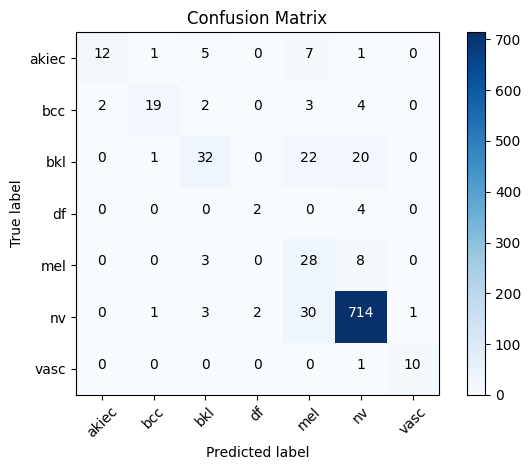

In [ ]:
# Define the labels of the class indices. These need to match the
# order shown above.
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#Generating Classification Report

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.86      0.46      0.60        26
         bcc       0.86      0.63      0.73        30
         bkl       0.71      0.43      0.53        75
          df       0.50      0.33      0.40         6
         mel       0.31      0.72      0.43        39
          nv       0.95      0.95      0.95       751
        vasc       0.91      0.91      0.91        11

    accuracy                           0.87       938
   macro avg       0.73      0.63      0.65       938
weighted avg       0.90      0.87      0.87       938

